# Assignment 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
from matplotlib import cm

## 2.1 Poisson Equations

### 2.1.1

<font  face=Times color=darkblue size=3>  First, we consider again the simplest charge distribution but consider the von Neumann boundary condition: $\frac{\partial\phi}{\partial x}|_{\partial V}=0$. The derivative can be replaced by $\frac{\partial\phi}{\partial x}|_{\partial V}=\frac{\phi_1-\phi_0}{h}$.

In [2]:

N=20 #2 of N are boundaries
d=2
epsilon=1
h=1
#initial condition
potential_initial=np.zeros((N,N)) #this includes boundary
charge_density=np.ones((N,N))   #uniform distribution for introduction of the methods
sigma=1

In [3]:
def jacobi_relaxation(bound_jr):
    iterations=0
    potential_here=copy.deepcopy(potential_initial)
    while True:
        iterations+=1
        potential_new=copy.deepcopy(potential_here)  #set phi_new
        for i in range(1,N-1):
            for j in range(1,N-1): # simulate all N-2*N-2 sites using discretized poisson equation, no simulation for boundary 
                left_index=j-h
                right_index=j+h
                up_index=i+h
                down_index=i-h
                potential_new[i,j]=(1/(2*d))*(potential_here[i,left_index]+potential_here[i,right_index]+potential_here[up_index,j]
                                              +potential_here[down_index,j])+(h**2/(2*d*epsilon))*charge_density[i,j] 
            
        #get the boundary
        for i in range(2,N-2):
            potential_new[i,0]=potential_new[i,1]-sigma*h
            potential_new[i,N-1]=potential_new[i,N-2]+sigma*h
        for j in range(2,N-2):
            potential_new[0,j]=potential_new[1,j]-sigma*h
            potential_new[N-1,j]=potential_new[N-2,j]+sigma*h
        #print(iterations,potential_new)
        max_delta=np.max(np.abs(potential_new-potential_here)) # compute delta_phi
        if max_delta <= bound_jr:
            break
        else:
            potential_here=copy.deepcopy(potential_new)
    return iterations,potential_new

In [4]:
iterations_jr,potential_jr=jacobi_relaxation(0.001)

In [5]:
iterations_jr #iterations_needed

3199

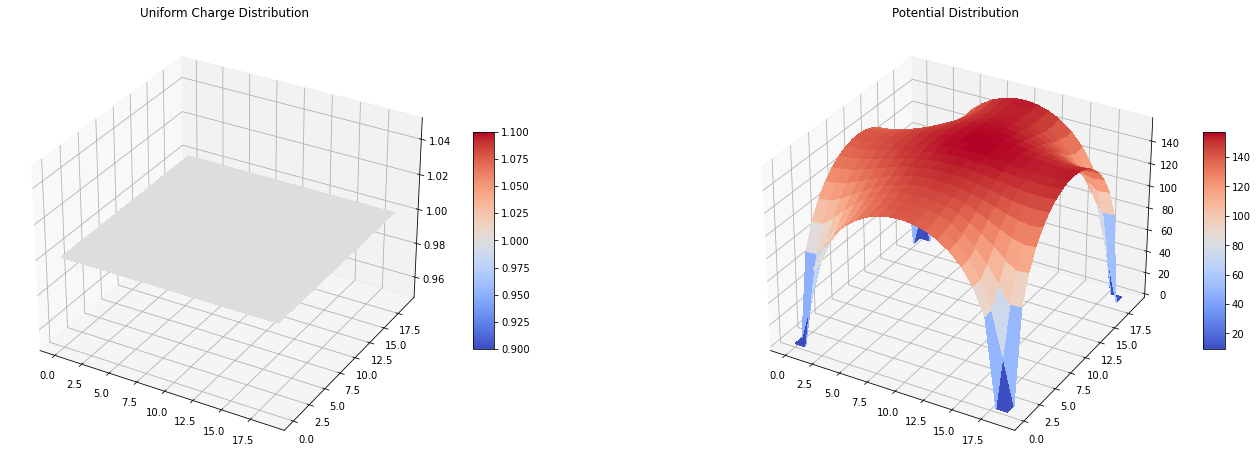

In [12]:
from matplotlib import cm
fig_jr=plt.figure(figsize=(24,8))
ax1_jr = fig_jr.add_subplot(1, 2, 1, projection='3d')
X1 = np.arange(0,N)
Y1 = np.arange(0,N)
X1, Y1 = np.meshgrid(X1, Y1)
Z1_jr = charge_density[0:N,0:N]
surf1_jr = ax1_jr.plot_surface(X1, Y1, Z1_jr, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax1_jr.set_title('Uniform Charge Distribution')
fig_jr.colorbar(surf1_jr, shrink=0.5, aspect=10)

ax3_jr = fig_jr.add_subplot(1, 2, 2, projection='3d')
Z3_jr = potential_jr[0:N,0:N]
surf3_jr = ax3_jr.plot_surface(X1, Y1, Z3_jr, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax3_jr.set_title('Potential Distribution')
fig_jr.colorbar(surf3_jr, shrink=0.5, aspect=10)

### 2.1.2

<font  face=Times color=darkblue size=3> Here, we consider again the poisson equation. Still, the time spacing $h=1$, $\epsilon_0=1$ and we consider $N\times N$ two-dimensional cases($d=2$ and including the boundary). We use Dirichlet boundary conditions: $\phi(\vec{x}_\vec{r}) =0$ for $\vec{x}_\vec{r}\in \partial V$. <br><br>However, we consider a different charge distribution from those introduced in the lecture. On the 2d plane, we consider an isosceles triangle, whose hypotenuse lies in the middle of the $\frac{7N}{10}$th row and has a length of $\frac{4N}{5}$,The points inside the triangle(including those on the edge) have some fixed charge (1), while those outside have no charge.
    <br><br>We use Jacobi Relaxation, Gauss-Seidel Relaxation, Successive Overrelaxation respectively and consider N=10, 20, 40 (boundary then adds 2 more). Compare the number of iterations for different methods and find how that number changes with N. Also we plot the charge and potential at N=40.

In [2]:
def charge_distribution(N_here):
    density_here=np.zeros((N_here+2,N_here+2))
    for i in range(int(0.3*N_here+1),int(0.3*N_here+1+0.4*N_here)):
        num_points=int(0.8*N_here-2*(0.3*N_here+1+0.4*N_here-1-i))
        start_point=int(0.1*N_here+1+(0.3*N_here+1+0.4*N_here-1-i))
        for j in range(start_point,start_point+num_points):
            density_here[i,j]=1
    return density_here

In [8]:
charge_distribution(10)[1:11,1:11]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 1., 0., 0., 0.],
       [0., 0., 1., 1., 1., 1., 1., 1., 0., 0.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [41]:
def jacobi_relaxation(bound_jr):
    iterations=0
    potential_here=copy.deepcopy(potential_initial) # pay attention to the difference between copy and deepcopy
    while True:
        iterations+=1
        potential_new=copy.deepcopy(potential_here)  #set phi_new
        for i in range(1,N+1):
            for j in range(1,N+1): # simulate all N*N sites using discretized poisson equation, no simulation for boundary 
                left_index=i-h
                right_index=i+h
                up_index=j+h
                down_index=j-h
                potential_new[i,j]=(1/(2*d))*(potential_here[i,up_index]+potential_here[i,down_index]+potential_here[right_index,j]
                                              +potential_here[left_index,j])+(h**2/(2*d*epsilon))*charge_density[i,j] 
        max_delta=np.max(np.abs(potential_new-potential_here)) # compute delta_phi
        if max_delta <= bound_jr:
            break
        else:
            potential_here=copy.deepcopy(potential_new)
        #print(iterations,max_delta)
    return iterations,potential_new

In [42]:
def gauss_seidel_relaxation(bound_here):
    iterations=0
    potential_new=copy.deepcopy(potential_initial)
    while True:
        iterations+=1
        max_delta=0
        for i in range(1,N+1):
            for j in range(1,N+1): # simulate all N*N sites using discretized poisson equation, no simulation for boundary 
                left_index=i-h
                right_index=i+h
                up_index=j+h
                down_index=j-h
                potential_point_new=(1/(2*d))*(potential_new[i,up_index]+potential_new[i,down_index]+potential_new[right_index,j]
                                              +potential_new[left_index,j])+(h**2/(2*d*epsilon))*charge_density[i,j] #new point
                max_delta=max(max_delta,np.abs(potential_new[i,j]-potential_point_new))  #delta_phi
                potential_new[i,j]=potential_point_new #update point
        if max_delta <= bound_here:
            break
        #print(iterations,max_delta)
    return iterations,potential_new

In [43]:
def sor(bound_here):
    iterations=0
    potential_new=copy.deepcopy(potential_initial)
    rhere=np.cos(np.pi/(N))
    w_opt=2/(1+np.sqrt(1-rhere**2))
    print(w_opt)
    while True:
        iterations+=1
        max_delta=0
        for i in range(1,N+1):
            for j in range(1,N+1): # simulate all N*N sites using discretized poisson equation, no simulation for boundary 
                left_index=i-h
                right_index=i+h
                up_index=j+h
                down_index=j-h
                potential_point_new=(1-w_opt)*potential_new[i,j]+w_opt*((1/(2*d))*(potential_new[i,up_index]
                                                                                   +potential_new[i,down_index]
                                                                                   +potential_new[right_index,j]
                                              +potential_new[left_index,j])+(h**2/(2*d*epsilon))*charge_density[i,j]) #new point
                max_delta=max(max_delta,np.abs(potential_new[i,j]-potential_point_new))  #delta_phi
                potential_new[i,j]=potential_point_new #update point
        if max_delta <= bound_here:
            break
        #print(iterations,max_delta)
    return iterations,potential_new

In [44]:
N=10
charge_density=charge_distribution(N)
d=2
epsilon=1
h=1
potential_initial=np.zeros((N+2,N+2)) #this includes boundary=0

In [45]:
iterations_jr,potential_jr=jacobi_relaxation(0.001)

In [46]:
iterations_jr

120

In [47]:
iterations_gs,potential_gs=gauss_seidel_relaxation(0.001)

In [48]:
iterations_gs

70

In [49]:
iterations_sor,potential_sor=sor(0.001)

1.5278640450004206


In [50]:
iterations_sor

23

In [51]:
N=20
charge_density=charge_distribution(N)
d=2
epsilon=1
h=1
potential_initial=np.zeros((N+2,N+2)) #this includes boundary=0

In [52]:
iterations_jr,potential_jr=jacobi_relaxation(0.001)

In [53]:
iterations_jr

438

In [54]:
iterations_gs,potential_gs=gauss_seidel_relaxation(0.001)

In [55]:
iterations_gs

251

In [56]:
iterations_sor,potential_sor=sor(0.001)

1.7294538172817453


In [57]:
iterations_sor

44

In [58]:
N=40
charge_density=charge_distribution(N)
d=2
epsilon=1
h=1
potential_initial=np.zeros((N+2,N+2)) #this includes boundary=0

In [59]:
iterations_jr,potential_jr=jacobi_relaxation(0.001)

In [60]:
iterations_jr

1666

In [61]:
iterations_gs,potential_gs=gauss_seidel_relaxation(0.001)

In [62]:
iterations_gs

953

In [63]:
iterations_sor,potential_sor=sor(0.001)

1.854497781068102


In [64]:
iterations_sor

86

In [65]:
%matplotlib notebook

<IPython.core.display.Javascript object>


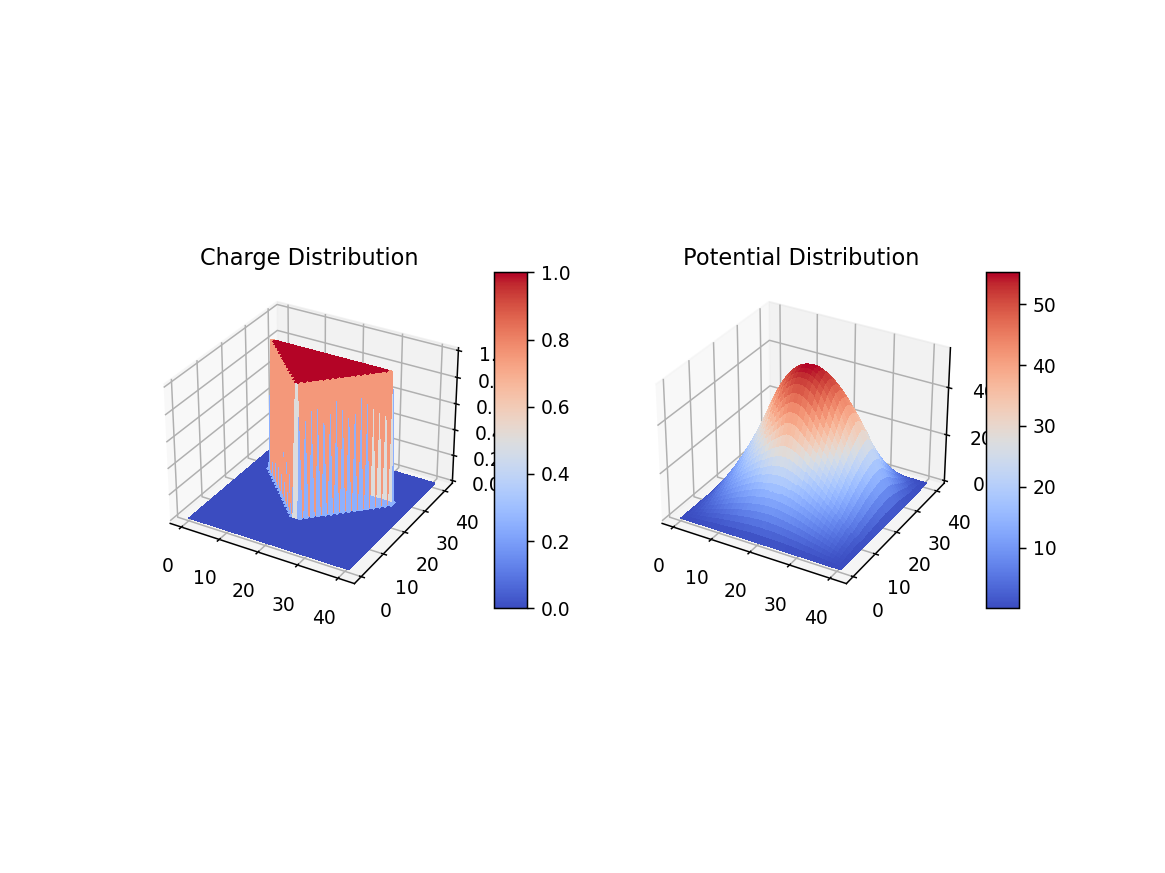

In [66]:
fig_sor=plt.figure()#(figsize=(24,8))
ax1_sor = fig_sor.add_subplot(1, 2, 1, projection='3d')
X1 = np.arange(0,N+2)
Y1 = np.arange(0,N+2)
X1, Y1 = np.meshgrid(X1, Y1)
Z1_sor = charge_density[0:N+2,0:N+2]
surf1_sor = ax1_sor.plot_surface(X1, Y1, Z1_sor, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax1_sor.set_title('Charge Distribution')
fig_sor.colorbar(surf1_sor, shrink=0.5, aspect=10)

ax3_sor = fig_sor.add_subplot(1, 2, 2, projection='3d')
Z3_sor = potential_sor[0:N+2,0:N+2]
surf3_sor = ax3_sor.plot_surface(X1, Y1, Z3_sor, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax3_sor.set_title('Potential Distribution')
fig_sor.colorbar(surf3_sor, shrink=0.5, aspect=10)

<font  face=Times color=darkblue size=3>We can see that the iterations of Jacobi Relaxation and Gauss-Seidel Relaxation is approxiamately propotional to $N_s=N^2$, while that of the SOR is approximately proportional to $\sqrt{N_s}=N$. Comparing the methods, the numbers of iterations basically accord with the formula given in the lecture.

## 2.2 Stability Analysis

<font  face=Times color=darkblue size=3> We examine the Von Neumann stability of different methods for the advection equation. 
<br><br>1. FTCS Scheme:<br>The iteration equation is: $$u(n+1,r)=u(n,r)-\frac{c\tau}{2h}(u(n,r+1)-u(n,r-1)).$$ To check, we insert an Ansatz $u(n,r)=A^ne^{ikrh}$ into the iteration equation and we get $|A|=\sqrt{1+(\frac{c\tau}{h})^2\sin^2{kh}}>1$. Therefore, the FTCS scheme is unconditionally unstable for advection equation.
    <br><br>2. FTFS Scheme:<br>The iteration equation is: $$u(n+1,r)=u(n,r)-\frac{c\tau}{h}(u(n,r+1)-u(n,r).$$ Again we insert the same Ansatz and we get $A=1+\frac{c\tau}{h}-\frac{c\tau}{h}e^{ikh}$ and obviously $|A|>1.$ It is not stable for advection equation as well.
    <br><br>3. CTCS (this is the Leap-Frog): <br> Now we discretize the equation as $$\frac{u(n+1,r)-u(n-1,r)}{\tau}=-\frac{F(n,r+1)-F(n,r-1)}{\tau},$$ so the iteration equation is $$u(n+1,r)=u(n-1,r)-\frac{\tau}{h}(F(n,r+1)-F(n,r-1)).$$  Here, we get $$A=-i\frac{c\tau}{h}\sin{kh}\pm\sqrt{\frac{-c^2\tau^2}{h^2}\sin^2{kh}+1}.$$ Therefore, it is only stable when $\frac{c\tau}{h}\leq 1$.

## 2.3 Traffic Flow

<font  face=Times color=darkblue size=3> In this question, we are gonna use Lax-Wendorff Method to study the traffic flow. We simplify
 the flux as $F(x)=c*\rho(x)$ so we get an advection function. we denote $C=\frac{c\tau}{h}$ and we set $C=\pm 1$ respectively and use Lax-wendorff method to see the different direction of flow. The initial condition is $\rho(t=0,x)=\rho_0(x)= \begin{cases}\rho_{max}=1, \frac{L}{4}<x<\frac{L}{2}\\ 0,else \end{cases}$.

In [67]:
# set parameters given above
n=1000 #t=n*tau
L=400
h=1
C=1

In [68]:
rho_list=np.zeros((n,int(L/h)+1))  #build list of rho

#initial condition
for i in range(int(L/4),int(L/2)):
    rho_list[0,i]=1
t_list=[0]

In [69]:
x_list=np.arange(0,L+1)

In [70]:
for i in range(1,n):
    t_list.append(i)
    for j in range(int(L/h)+1):
        j_plus1=j+1
        j_minus1=j-1
        #periodic boundary
        if j_plus1>int(L/h):
            j_plus1=0
        if j_minus1<0:
            j_minus1=int(L/h)
        rho_list[i,j]=rho_list[i-1,j]-(0.5*C)*(rho_list[i-1,j_plus1]-rho_list[i-1,j_minus1])+(0.5*(C**2))*(rho_list[i-1,j_plus1]+rho_list[i-1,j_minus1]-2*rho_list[i-1,j])

<IPython.core.display.Javascript object>


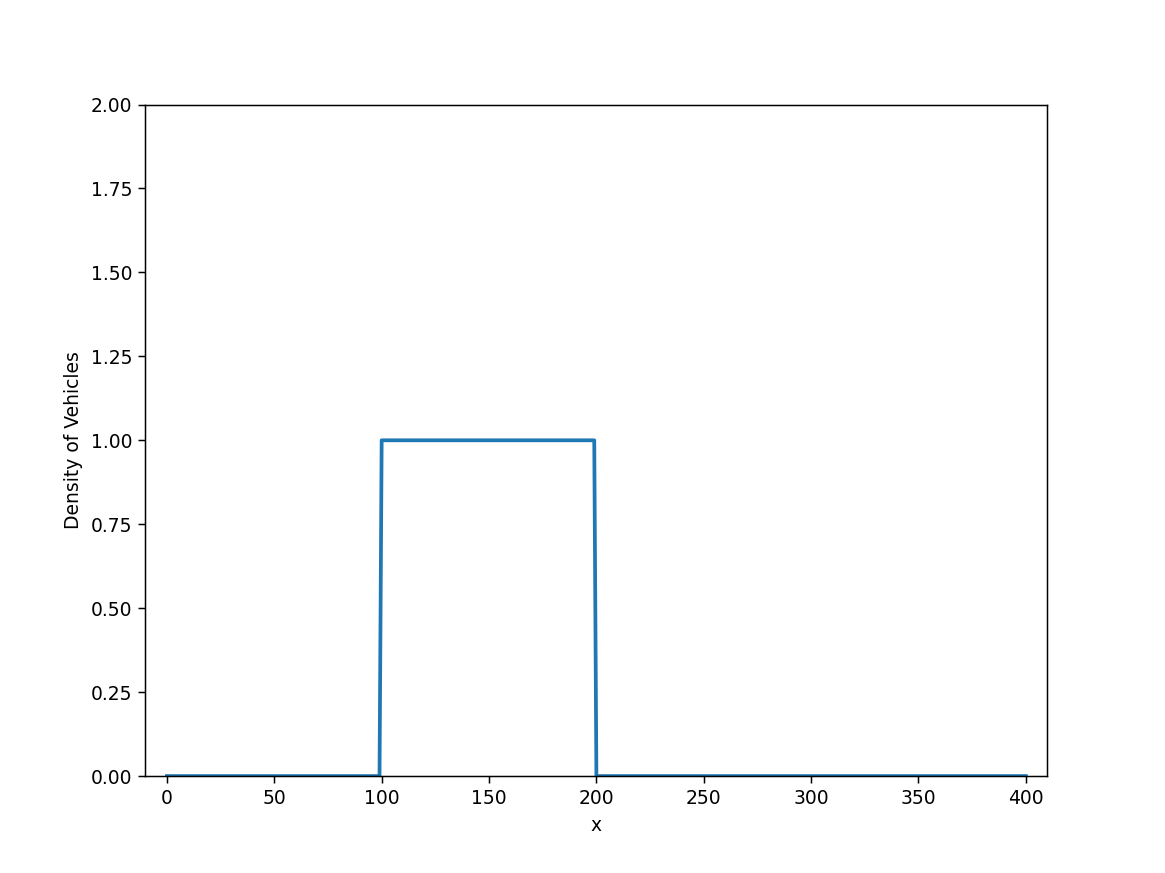

In [71]:
from matplotlib import rc
from matplotlib import animation
fig_,ax = plt.subplots()
line2, = ax.plot([], [], lw=2)
plt.xlim(-10,410)
plt.ylim(0,2)
plt.xlabel('x')
plt.ylabel('Density of Vehicles')
def animate(i):
    xx=x_list
    yy=rho_list[i*10]
    line2.set_data(xx, yy)
    return (line2,)
anim = animation.FuncAnimation(fig_, animate, frames=100, interval=300, blit=True)
rc('animation', html='jshtml')
anim